In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("NAS.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
5,2003-12-25,NaN,NaN,NaN,NaN,NaN,NaN
6,2003-12-26,NaN,NaN,NaN,NaN,NaN,NaN
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
8,2003-12-30,17.425800,17.882900,17.425800,17.711500,17.711500,67298.0
9,2003-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Let's first remove rows containing NaN values as these are not needed
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
5,2003-12-30,17.425800,17.882900,17.425800,17.711500,17.711500,67298.0
6,2004-01-02,17.940001,18.054300,17.768600,17.768600,17.768600,322923.0
7,2004-01-05,18.054300,18.054300,17.711500,17.711500,17.711500,182782.0
8,2004-01-06,17.940001,17.997101,17.597200,17.597200,17.597200,300054.0
9,2004-01-07,17.425800,17.711500,17.140100,17.140100,17.140100,189937.0


In [4]:
# Close and Adj Close look like they contain the same values, to check:
for i in range(len(df)):
    if df["Close"][i] != df["Adj Close"][i]:
        print("Not equal")

In [5]:
# Let's figure out the type of the dates in the Date column 
# (our independent variable): 
print(type(df["Date"][1]))

<class 'str'>


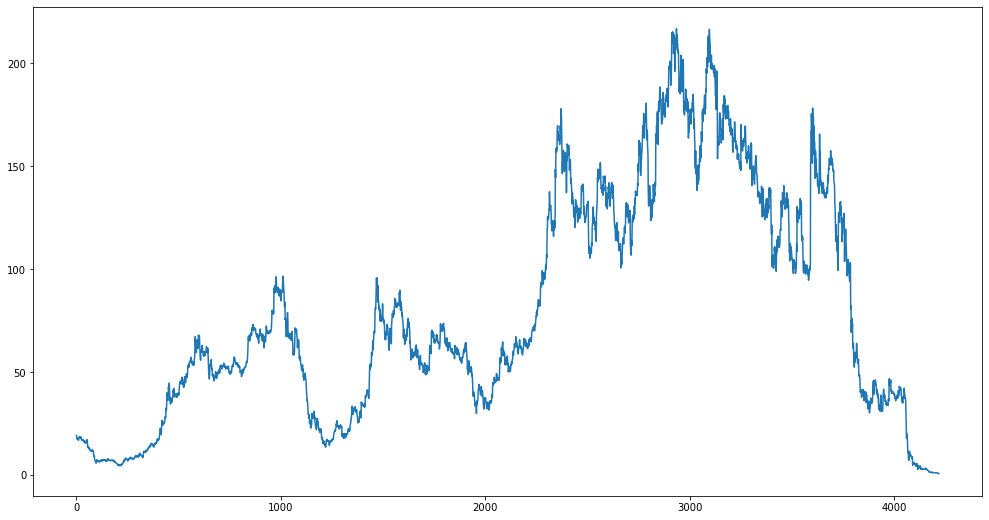

In [6]:
plt.figure(figsize=(17,9))
plt.plot(df.Close)

In [7]:
# The task asks us to specifically use "Close" (i.e. closing price) as the 
# target variable and "Date" as the input variable. 
# Hence, we do not need the other columns
dataframe = df.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis = 1)
dataframe.head(10)

,Date,Close
0,2003-12-18,19.139799
1,2003-12-19,18.454201
2,2003-12-22,18.054300
3,2003-12-23,17.425800
4,2003-12-29,17.254400
5,2003-12-30,17.711500
6,2004-01-02,17.768600
7,2004-01-05,17.711500
8,2004-01-06,17.597200
9,2004-01-07,17.140100


In [8]:
len(dataframe)

4218

Since we have a continous target variable, this is a regression problem which requires a regression algorithm. However, a problem with regression algorithms is overfitting, which basically means poor generalization in that the model gives good predictions on the training data but not on new data. This can happen if the model captures "everything it gets" instead of the just the pattern (or signal) we are looking for in the dataset. It is not easy to predict the price of a stock, because it can change at any time due to random events happening in the world. We have a small dataset, and we will not be able to show if a model is truly overfit or not based on this data, but we can compare a few of the regression algorithms from sklearn. We see from the above graph showing dates vs. closing price that linear regression is not suitable for this problem. We need an unbiased algorithm capable of reflecting the pattern in the data. To illustrate the difference between a poorly performing algorithm and a good one, we will first show how linear regression performs on the dataset.

In [9]:
price = dataframe.Close 
price

0       19.139799
1       18.454201
2       18.054300
3       17.425800
4       17.254400
          ...    
4213     0.676800
4214     0.600600
4215     0.626000
4216     0.605000
4217     0.610600
Name: Close, Length: 4218, dtype: float64

In [10]:
# We will split Date into Year, Month and Day and then let these be our 
# independent variables
split_dates = dataframe["Date"].str.split("-")
dates_list = split_dates.to_list()
column_names = ["Year", "Month", "Day"]
df_date = pd.DataFrame(dates_list, columns = column_names)
print(df_date)

      Year Month Day
0     2003    12  18
1     2003    12  19
2     2003    12  22
3     2003    12  23
4     2003    12  29
...    ...   ...  ..
4213  2020    10  12
4214  2020    10  13
4215  2020    10  14
4216  2020    10  15
4217  2020    10  16

[4218 rows x 3 columns]


In [11]:
dataframe = pd.concat([dataframe.reset_index(drop=True), 
                      df_date.reset_index(drop=True)], axis = 1)
del dataframe["Date"]
dataframe = dataframe[["Year", "Month", "Day", "Close"]]
dataframe.head()

,Year,Month,Day,Close
0,2003,12,18,19.139799
1,2003,12,19,18.454201
2,2003,12,22,18.054300
3,2003,12,23,17.425800
4,2003,12,29,17.254400


In [12]:
dataframe["Year"] = dataframe["Year"].astype("int")

In [13]:
dataframe["Month"] = dataframe["Month"].astype("int")

In [14]:
dataframe["Day"] = dataframe["Day"].astype("int")

# Linear regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
%matplotlib notebook

In [17]:
x = dataframe.drop("Close", axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, dataframe.Close, 
                                                   test_size = 0.20, 
                                                   random_state = 1)

In [19]:
model = LinearRegression()
model.fit(X_train.values, y_train.values)

LinearRegression()

In [20]:
model.predict(X_test.values)

array([122.25802428,  88.10792435,  77.92712035,  63.70504978,
        81.82734494,  90.17043896,  65.963285  ,  52.05905464,
        53.28345326,  32.88537858,  75.70568563,  92.83061088,
        80.92078651, 119.70465174,  84.07148253, 103.99279691,
        97.06243947,  94.37956469,  59.98678199, 119.27329718,
        93.35277691,  92.33975294, 104.07655958,  58.05154553,
        89.39149252,  98.55222374,  68.58665641, 125.59928233,
       124.12515212, 110.86176072, 106.90941539,  49.20865452,
        74.52669275,  58.62616613,  97.1007964 ,  53.51753079,
       100.29689816,  57.49257899,  61.33140996,  91.00183996,
       118.39649044,  43.2321515 ,  80.83702384, 124.65436698,
        86.00671898,  70.91489049,  73.64988601,  84.5098859 ,
        55.37571957,  34.6162892 ,  67.80770997, 124.44299232,
        58.44454316,  37.15589793, 103.41112749,  35.28172128,
       113.1899948 ,  94.45472212,  66.83304293,  91.96945819,
       105.54879954,  73.33204581,  39.74762741,  66.12

In [21]:
y_test.values

array([ 37.18    , 109.411003,  47.421001,  33.7089  ,  70.845802,
       129.294006,  66.560799,  68.560501,  69.131798,  17.997101,
        29.8524  , 130.722   ,  61.133099,  34.060001, 123.294998,
       158.317993, 215.050995, 180.656998,  17.1401  ,  39.18    ,
       140.548996, 128.207993, 162.317001,  27.995501, 137.292007,
       178.429001,  71.702797,   1.0475  ,   2.987   , 125.466003,
       133.464005,  53.134399,  59.7047  ,  21.768   , 189.397995,
        75.130798, 153.975006,  35.994202,  19.996799, 121.351997,
        34.169998,  38.850899,  64.561096,   2.879   , 151.404007,
        69.417503,  61.704399, 156.832001,  68.8461  ,   6.57038 ,
        74.8452  ,   2.879   ,  27.1385  ,   4.62783 , 171.401001,
         7.31312 , 157.804993, 139.634995,  76.844803, 119.524002,
       161.003006,  58.276402,  11.3125  ,  72.845497, 171.287003,
       171.686996,  52.333302,  58.276402, 168.544006, 173.115005,
        16.5116  ,  23.539101, 137.102005, 112.382004, 177.115

In [22]:
model.predict(np.array([[2020, 12, 22]]))

array([127.14152116])

In [23]:
model.score(X_test.values, y_test.values)

0.2551839773627287

### As we can see, the accuracy score for linear regression is only about 26 percent, which means our model is performing really bad. This is bias - the inability for the machine learning model to capture the true relationship. We can clearly see from the plot above (showing the stock price vs. dates of our dataset) that this is not linear relationship

# RandomForestRegressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train.values, y_train.values)

RandomForestRegressor()

In [25]:
model_rf.predict(X_test.values)

array([ 38.9139009 , 109.8750889 ,  47.83660189,  33.00587803,
        71.14004261, 136.86636973,  69.19753317,  68.4433683 ,
        69.3917506 ,  18.26964727,  35.27718859, 127.56314786,
        61.21589677,  34.35240029, 126.46113032, 159.4894308 ,
       211.09783712, 174.95885118,  16.93903426,  38.78830067,
       141.73414114, 124.37434823, 163.67547638,  28.39373   ,
       138.99096034, 176.12967612,  70.86578332,   1.03292   ,
         3.73041   , 125.308488  , 131.45078175,  53.25006547,
        60.65601166,  22.71064868, 194.96104881,  76.28491828,
       159.61495934,  37.96818507,  18.97241928, 116.74541115,
        35.18200163,  39.41511187,  65.74948127,   2.94073   ,
       152.13349626,  63.56694403,  61.22164581, 154.31656454,
        68.46907111,   6.4949596 ,  73.85959061,   2.83373   ,
        24.82687523,   4.7885479 , 169.61858931,   7.0377301 ,
       161.24339274, 149.50447296,  76.0849405 , 118.96373086,
       154.50534692,  58.64916362,  11.233032  ,  71.77

In [26]:
y_test.values

array([ 37.18    , 109.411003,  47.421001,  33.7089  ,  70.845802,
       129.294006,  66.560799,  68.560501,  69.131798,  17.997101,
        29.8524  , 130.722   ,  61.133099,  34.060001, 123.294998,
       158.317993, 215.050995, 180.656998,  17.1401  ,  39.18    ,
       140.548996, 128.207993, 162.317001,  27.995501, 137.292007,
       178.429001,  71.702797,   1.0475  ,   2.987   , 125.466003,
       133.464005,  53.134399,  59.7047  ,  21.768   , 189.397995,
        75.130798, 153.975006,  35.994202,  19.996799, 121.351997,
        34.169998,  38.850899,  64.561096,   2.879   , 151.404007,
        69.417503,  61.704399, 156.832001,  68.8461  ,   6.57038 ,
        74.8452  ,   2.879   ,  27.1385  ,   4.62783 , 171.401001,
         7.31312 , 157.804993, 139.634995,  76.844803, 119.524002,
       161.003006,  58.276402,  11.3125  ,  72.845497, 171.287003,
       171.686996,  52.333302,  58.276402, 168.544006, 173.115005,
        16.5116  ,  23.539101, 137.102005, 112.382004, 177.115

In [27]:
model_rf.predict(np.array([[2020, 12, 22]]))

array([0.622232])

In [28]:
model_rf.score(X_test.values, y_test.values)

0.9974167377010362

### Stock prices are believed to behave in correlation with which day of the week or month it is. This is why creating features like Year, Month and Day and then using RandomForest works so well. RandomForest regression works by combining multiple decision trees, and taking the average of the price values related to an interval in the independent variables (if day < 20, the stock price is "some value"). However, note that the model might be capturing the noise in the dataset and not an actual pattern that works on other dataset (i.e. the model might be overfit). To check we could have tried to use the model on a completely new dataset having the same features and see if we still get a good accuracy score.